In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Human Image Detection Eval**

In [2]:
!git clone https://github.com/semajyllek/ioqm.git

Cloning into 'ioqm'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 136 (delta 69), reused 100 (delta 33), pack-reused 0
Receiving objects: 100% (136/136), 29.13 KiB | 2.24 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
!pip install -r ioqm/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.2 MB/s et

In [4]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 994.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.1 MB/s eta 0:00:00


In [5]:
%cd ioqm

/content/ioqm


In [6]:
from typing import List
from utils import parse_objects_and_quantities
from pathlib import Path
import gradio as gr
import random
import json
import os

In [7]:
# code to launch gradio app and pull a random image and save result
def get_random_image(img_path, max_images=16175):
  rand_n = random.sample(range(1, max_images), 1)[0]
  rand_img = img_path / os.listdir(img_path)[rand_n]
  return rand_img


def get_expected_labels(img_path) -> List[str]:
  expected_obs = parse_objects_and_quantities(img_path.stem.replace('_', ' '))
  return list(expected_obs.keys())

def eval_interface(img_path: Path, score_path: Path):
  expected_labels = get_expected_labels(img_path)

  def process_counts(*counts):
    count_dict = {}
    for labl, cnt in zip(expected_labels, counts):
      count_dict[labl] = cnt

    with open(score_path, 'a') as f:
      json.dump({img_path.name: count_dict}, f)
      f.write('\n')
    demo.close()


  with gr.Blocks() as demo:
    gr.Image(img_path)
    counts = []
    for labl in expected_labels:
      counts.append(gr.Number(label=labl))

    submit_btn = gr.Button("submit counts")
    submit_btn.click(fn=process_counts, inputs=counts, outputs=None)

  demo.launch()


In [8]:
# paths to generated images of both original and v2 datasets and paths to save evaluations
ioqm_data_root = Path("/content/drive/MyDrive/ioqm_data")

# 16K image data
gen_data_root = ioqm_data_root / "generated_images_v1"
sd_v1_5_img_folder = gen_data_root / "stable-diffusion-v1-5_images"
sd_xl_refiner_1_img_folder = gen_data_root / "stable-diffusion-xl-refiner-1.0_images"
wuerstchen_img_folder = gen_data_root / "wuerstchen_images"

# 4K image data
gen_data_root_v2 = ioqm_data_root / "generated_images_v2"
sd_v1_5_img_v2_folder = gen_data_root_v2 / "stable-diffusion-v1-5_images"
sd_xl_refiner_1_img_v2_folder = gen_data_root_v2 / "stable-diffusion-xl-refiner-1.0_images"
wuerstchen_img_folder_v2 = gen_data_root_v2 / "wuerstchen_images"

# path to save evals
human_eval_root = ioqm_data_root / "eval" / "human_labels"

In [9]:
# to be configured for each experiment/session
img_folder = sd_xl_refiner_1_img_v2_folder
human_labels_path = human_eval_root / f"{img_folder.name}_human_labels.jsonl"
max_images = len(os.listdir(img_folder))

In [10]:
rand_img_path = get_random_image(img_folder, max_images=max_images)
eval_interface(rand_img_path, human_labels_path)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b1abde5a38980cb36a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Scoring Human Labels**

In [11]:
from run_eval import get_prompt_and_scores
from gen_model_ids import GEN_MODEL_IDS

In [12]:
import json

def save_human_scores_helper(labelled_path: Path, save_path: Path):
  with open(labelled_path, 'r') as f:
    json_list = list(f)

  with open(save_path, 'w') as wf:
    for json_str in json_list:
      labelled_data = json.loads(json_str)
      img_path, quantities = labelled_data.popitem()
      prompt, scores = get_prompt_and_scores(img_path, quantities)
      json.dump({prompt: scores}, wf)
      wf.write('\n')


In [13]:
def save_human_scores(gen_model_ids):
  for gid in gen_model_ids:
    model_name = gid.split('/')[1]
    v1_labelled_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_labels/v1_{model_name}_images_human_labels.jsonl")
    v1_save_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_validation_scores/v1_{model_name}_scores.jsonl")
    save_human_scores_helper(v1_labelled_path, v1_save_path)

    # v2 data
    v2_labelled_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_labels/v2_{model_name}_images_human_labels.jsonl")
    v2_save_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_validation_scores/v2_{model_name}_scores.jsonl")
    save_human_scores_helper(v2_labelled_path, v2_save_path)

In [14]:
#save_human_scores(GEN_MODEL_IDS)

# **Auto Scoring Validation**

In [15]:
from run_eval import get_detector, evaluate_single_image, run_eval

In [16]:
img_file = "/content/drive/MyDrive/ioqm_data/generated_images_v2/stable-diffusion-xl-refiner-1.0_images/3_broccolis_and_1_toaster.png"

In [17]:
res_det_model_id = "facebook/detr-resnet-50"
res100_det_model_id = "facebook/detr-resnet-101"
res_pan_det_model_id = "facebook/detr-resnet-50-panoptic"
swin_det_model_id = 'jozhang97/deta-swin-large'
yolo_det_model_id = 'yolo'

In [18]:
detector = get_detector(yolo_det_model_id)

100%|██████████| 131M/131M [00:00<00:00, 155MB/s]


In [19]:
res = detector(img_file);res

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

0: 640x640 4 broccolis, 1 toaster, 4535.9ms
Speed: 3.7ms pre-process, 4535.9ms inference, 30.1ms postprocess per image at shape (1, 3, 640, 640)


[ObjectPrediction<
     bbox: BoundingBox: <(0, 749, 260, 999), w: 260, h: 250>,
     mask: None,
     score: PredictionScore: <value: 0.948686420917511>,
     category: Category: <id: 50, name: broccoli>>,
 ObjectPrediction<
     bbox: BoundingBox: <(7, 35, 438, 564), w: 431, h: 529>,
     mask: None,
     score: PredictionScore: <value: 0.9105961322784424>,
     category: Category: <id: 50, name: broccoli>>,
 ObjectPrediction<
     bbox: BoundingBox: <(327, 509, 588, 735), w: 261, h: 226>,
     mask: None,
     score: PredictionScore: <value: 0.8887491226196289>,
     category: Category: <id: 50, name: broccoli>>,
 ObjectPrediction<
     bbox: BoundingBox: <(670, 330, 984, 553), w: 314, h: 223>,
     mask: None,
     score: PredictionScore: <value: 0.8724386096000671>,
     category: Category: <id: 50, name: broccoli>>,
 ObjectPrediction<
     bbox: BoundingBox: <(209, 670, 670, 992), w: 461, h: 322>,
     mask: None,
     score: PredictionScore: <value: 0.5085285902023315>,
     cat

In [20]:
evaluate_single_image(img_file, detector)


0: 640x640 4 broccolis, 1 toaster, 4409.0ms
Speed: 1.2ms pre-process, 4409.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


('3 broccolis and 1 toaster', {'hard_ioqm': 0.5, 'soft_ioqm': 1.0})

In [21]:
from typing import Any

# go through images scored by human and provide a detector score for each detector, save
def save_auto_scores(detector_model_id: str, gen_model_id: str):
  detector_model_name = detector_model_id.split('/')[-1]
  detector = get_detector(detector_model_id)

  model_name = gen_model_id.split('/')[-1]

  # v1 data
  human_score_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_validation_scores/v1_{model_name}_scores.jsonl")
  auto_save_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/auto_validation_scores/{detector_model_name}/v1_{model_name}_scores.jsonl")
  img_root = Path(f"/content/drive/MyDrive/ioqm_data/generated_images_v1/{model_name}_images")
  save_auto_scores_helper(detector, human_score_path, auto_save_path, img_root)

  # v2 data
  mini_human_score_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/human_validation_scores/v2_{model_name}_scores.jsonl")
  mini_auto_save_path = Path(f"/content/drive/MyDrive/ioqm_data/eval/auto_validation_scores/{detector_model_name}/v2_{model_name}_scores.jsonl")
  img_root = Path(f"/content/drive/MyDrive/ioqm_data/generated_images_v2/{model_name}_images")
  save_auto_scores_helper(detector, mini_human_score_path, mini_auto_save_path, img_root)



def save_auto_scores_helper(detector: Any, human_score_path: Path, auto_save_path: Path, img_root: Path):
  print(human_score_path.as_posix(), img_root.as_posix(), '\n')
  with open(human_score_path, 'r') as f:
    json_list = list(f)

  with open(auto_save_path, 'w') as wf:
    for json_str in json_list:
      scored_data = json.loads(json_str)
      prompt, human_scores = scored_data.popitem()
      img_path = prompt.replace(' ', '_') + '.png'
      img_path = img_root / img_path
      prompt, auto_scores = evaluate_single_image(img_path.as_posix(), detector)
      auto_scores['hard_diff'] = human_scores['hard_ioqm'] - auto_scores['hard_ioqm']
      auto_scores['soft_diff'] = human_scores['soft_ioqm'] - auto_scores['soft_ioqm']
      print(img_path.as_posix(), auto_scores)
      json.dump({prompt: auto_scores}, wf)
      wf.write('\n')



In [22]:
#save_auto_scores('yolo', GEN_MODEL_IDS[2])

# **Analysis**

In [23]:
import json
import pandas as pd
from typing import Dict, List, Union



def get_detector_data(detector_name: str) -> List[Dict[str, Union[str, float]]]:

  if detector_name == 'human':
    detector_folder_root = '/content/drive/MyDrive/ioqm_data/eval/human_validation_scores'
  else:
    detector_folder_root = f'/content/drive/MyDrive/ioqm_data/eval/auto_validation_scores/{detector_name}'

  detector_data = []
  for json_file in Path(detector_folder_root).glob('*.jsonl'):
    jf = json_file.name
    version, gen_model_name, _ = jf.split('_')
    detector_data.extend(get_detector_data_helper(detector_name, gen_model_name, json_file, version))

  return detector_data


def get_detector_data_helper(detector_name: str, gen_model_id: str, json_file: str, dataset_version: str) -> List[Dict[str, Union[str, float]]]:
  gen_model_name = gen_model_id.split('/')[-1]
  lines = []
  with open(json_file) as f:
    lines = f.read().splitlines()

  data = []
  for line in  lines:
    df = {}
    prompt, scores = json.loads(line).popitem()
    df['detector'] = detector_name
    df['gen_model'] = gen_model_name
    df['prompt'] = prompt
    df['soft_ioqm'] = scores['soft_ioqm']
    df['hard_ioqm'] = scores['hard_ioqm']

    if detector_name == 'human':
      df['soft_diff'] = 0.
      df['hard_diff'] = 0.
    else:
      df['soft_diff'] = scores['soft_diff']
      df['hard_diff'] = scores['hard_diff']

    df['data_version'] = dataset_version
    data.append(df)

  return data


In [24]:
detector_models = [
 'deta-swin-large',
 'detr-resnet-50',
 'yolo',
 'human'
]

def get_all_detector_data(detector_models: List[str]) -> List[Dict[str, Union[str, float]]]:
  detector_data = []
  for detector_name in detector_models:
    detector_data.extend(get_detector_data(detector_name))
  return detector_data

In [242]:
val_data = get_all_detector_data(detector_models)
val_df = pd.DataFrame(val_data)

In [244]:
val_df

,detector,gen_model,prompt,soft_ioqm,hard_ioqm,soft_diff,hard_diff,data_version
0,deta-swin-large,stable-diffusion-v1-5,2 trains and 2 broccolis,1.000000,0.000000,-0.5,0.5,v2
1,deta-swin-large,stable-diffusion-v1-5,3 broccolis and 1 toaster,0.000000,0.000000,0.5,0.5,v2
2,deta-swin-large,stable-diffusion-v1-5,3 chairs and 3 couches,0.333333,0.000000,0.0,0.0,v2
3,deta-swin-large,stable-diffusion-v1-5,1 sheep and 3 cars,1.000000,0.000000,0.0,0.0,v2
4,deta-swin-large,stable-diffusion-v1-5,3 potted plants and 2 people,1.000000,0.000000,0.0,0.0,v2
...,...,...,...,...,...,...,...,...
2395,human,wuerstchen,5 snowboards and 2 skis and 2 skateboards,0.566667,0.000000,0.0,0.0,v1
2396,human,wuerstchen,1 backpack and 1 skateboard and 2 hot dogs,0.333333,0.333333,0.0,0.0,v1
2397,human,wuerstchen,4 skis and 2 parking meters and 5 ties,0.500000,0.000000,0.0,0.0,v1
2398,human,wuerstchen,4 toothbrushes and 5 ties,0.000000,0.000000,0.0,0.0,v1


In [347]:
m = val_df
#m.drop(['hard_ioqm', 'soft_ioqm'], axis=1, inplace=True)
m = m[m['detector'].str.contains('human') == False]
m['soft_diff'] = m['soft_diff'].apply(abs)
m['hard_diff'] = m['hard_diff'].apply(abs)
m = m.groupby('detector').mean()
m.reset_index(inplace=True)
m

<ipython-input-347-7ec1ad9c28a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['soft_diff'] = m['soft_diff'].apply(abs)
<ipython-input-347-7ec1ad9c28a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['hard_diff'] = m['hard_diff'].apply(abs)
<ipython-input-347-7ec1ad9c28a5>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

,detector,soft_diff,hard_diff
0,deta-swin-large,0.240093,0.113889
1,detr-resnet-50,0.192315,0.119444
2,yolo,0.191625,0.113333


In [348]:
print(m.to_latex())

\begin{tabular}{llrr}
\toprule
{} &         detector &  soft\_diff &  hard\_diff \\
\midrule
0 &  deta-swin-large &   0.240093 &   0.113889 \\
1 &   detr-resnet-50 &   0.192315 &   0.119444 \\
2 &             yolo &   0.191625 &   0.113333 \\
\bottomrule
\end{tabular}



<ipython-input-348-28018ab33a33>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(m.to_latex())


In [345]:
detectors = m['detector'].tolist()
h_diff = m['hard_diff'].tolist()
s_diff = m['soft_diff'].tolist()

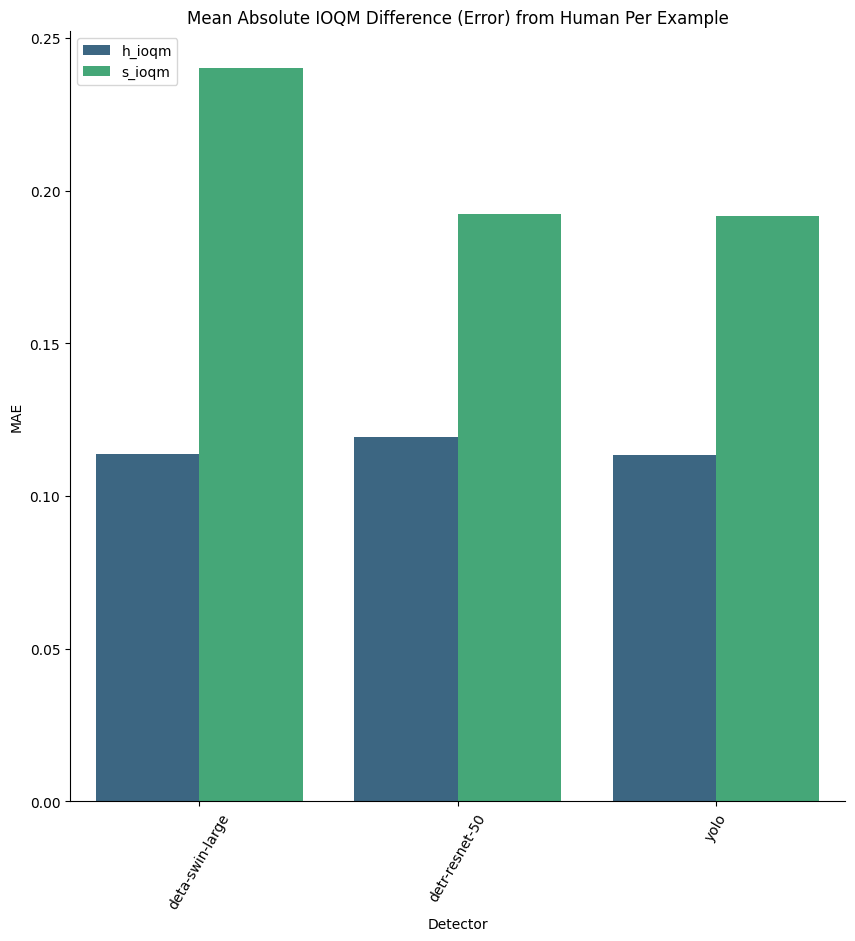

In [352]:
plot_validation_ioqm_bar(h_ioqms=h_diff, s_ioqms=s_diff, detectors=detectors, title="Mean Absolute IOQM Difference (Error) from Human Per Example", ylabel='MAE')

In [269]:
m['sum_diff'] = m['soft_diff'] + m['hard_diff']
m.reset_index(inplace=True)
m.drop(['hard_ioqm', 'soft_ioqm'], axis=1, inplace=True)
m = m[m['detector'].str.contains('human') == False]
print(m.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &         detector &  soft\_diff &  hard\_diff &  sum\_diff \\
\midrule
0 &  deta-swin-large &  -0.164759 &   0.038889 & -0.125870 \\
1 &   detr-resnet-50 &   0.084491 &   0.034444 &  0.118935 \\
3 &             yolo &   0.023782 &   0.031667 &  0.055449 \\
\bottomrule
\end{tabular}



<ipython-input-269-ea19a308267f>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(m.to_latex())


In [26]:
val_df['detector_gen_combo'] = val_df['detector'] + '_' + val_df['gen_model']
val_df.groupby(['detector_gen_combo']).mean()


<ipython-input-26-af7883801dd5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val_df.groupby(['detector_gen_combo']).mean()


,soft_ioqm,hard_ioqm,soft_diff,hard_diff
detector_gen_combo,,,,
deta-swin-large_stable-diffusion-v1-5,0.645236,0.125833,-0.171597,0.040000
deta-swin-large_stable-diffusion-xl-refiner-1.0,0.830472,0.140000,-0.148125,0.070833
deta-swin-large_wuerstchen,0.616611,0.167500,-0.174556,0.005833
detr-resnet-50_stable-diffusion-v1-5,0.401694,0.127500,0.071944,0.038333
detr-resnet-50_stable-diffusion-xl-refiner-1.0,0.588625,0.168333,0.093722,0.042500
detr-resnet-50_wuerstchen,0.354250,0.150833,0.087806,0.022500
human_stable-diffusion-v1-5,0.473639,0.165833,0.000000,0.000000
human_stable-diffusion-xl-refiner-1.0,0.682347,0.210833,0.000000,0.000000
human_wuerstchen,0.442056,0.173333,0.000000,0.000000


In [214]:
df = val_df[val_df.data_version == 'v1'].groupby(['detector_gen_combo', 'data_version']).mean()
df.reset_index(inplace=True)
df.drop(['data_version', 'soft_ioqm', 'hard_ioqm'], axis=1, inplace=True)
df

<ipython-input-214-24614f06a08a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = val_df[val_df.data_version == 'v1'].groupby(['detector_gen_combo', 'data_version']).mean()


,detector_gen_combo,soft_diff,hard_diff
0,deta-swin-large_stable-diffusion-v1-5,-0.288194,0.035000
1,deta-swin-large_stable-diffusion-xl-refiner-1.0,-0.250417,0.046667
2,deta-swin-large_wuerstchen,-0.246611,-0.023333
3,detr-resnet-50_stable-diffusion-v1-5,0.065556,0.051667
4,detr-resnet-50_stable-diffusion-xl-refiner-1.0,0.100778,0.055000
5,detr-resnet-50_wuerstchen,0.123111,0.010000
6,human_stable-diffusion-v1-5,0.000000,0.000000
7,human_stable-diffusion-xl-refiner-1.0,0.000000,0.000000
8,human_wuerstchen,0.000000,0.000000
9,yolo_stable-diffusion-v1-5,-0.007917,0.006667


In [240]:
m = df[df['detector_gen_combo'].str.contains('xl')]
m = m[m['detector_gen_combo'].str.contains('human') == False]
print(m.to_latex())

\begin{tabular}{llrr}
\toprule
{} &                               detector\_gen\_combo &  soft\_diff &  hard\_diff \\
\midrule
1  &  deta-swin-large\_stable-diffusion-xl-refiner-1.0 &  -0.250417 &   0.046667 \\
4  &   detr-resnet-50\_stable-diffusion-xl-refiner-1.0 &   0.100778 &   0.055000 \\
10 &             yolo\_stable-diffusion-xl-refiner-1.0 &  -0.030361 &   0.046667 \\
\bottomrule
\end{tabular}



<ipython-input-240-fad63830f343>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(m.to_latex())


In [217]:
m = m.sort_values(by='detector_gen_combo', ascending=False)

In [220]:
detector_gen_combos = m['detector_gen_combo'].tolist()
h_diff = m['hard_diff'].tolist()
s_diff = m['soft_diff'].tolist()

In [221]:
detector_gen_combos

['yolo_stable-diffusion-xl-refiner-1.0',
 'detr-resnet-50_stable-diffusion-xl-refiner-1.0',
 'deta-swin-large_stable-diffusion-xl-refiner-1.0']

In [222]:
h_diff, s_diff

([0.04666666666666667, 0.055, 0.04666666666666666],
 [-0.03036111111111111, 0.10077777777777777, -0.2504166666666667])

In [225]:
#h_ioqm2 = [h_ioqm[1]] + h_ioqm[:1] + h_ioqm[2:]
#s_ioqm2 = [s_ioqm[1]] + s_ioqm[:1] + s_ioqm[2:]
#detectors = [detector_gen_combos[2]] + detector_gen_combos[:2] + detector_gen_combos[3:]
h_diff = sorted(h_diff)
s_diff = sorted(s_diff)
detectors = ['swin', 'yolo', 'res-50']


In [227]:
title = "Difference From Human in Per Example IOQM on Stable DiffusionXL v1 Generated Images"

In [228]:
h_diff, s_diff

([0.04666666666666666, 0.04666666666666667, 0.055],
 [-0.2504166666666667, -0.03036111111111111, 0.10077777777777777])

In [132]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn

In [350]:
def plot_validation_ioqm_bar(h_ioqms, s_ioqms, title: str, h_lines: Tuple[float, float] = None, detectors = None, ylabel = 'IOQM'):
  if detectors == None:
    detectors = [
      'human',
      'swin',
      'res-50',
      'yolo',
    ]

  df = pd.DataFrame({
      'Detector': detectors,
      'h_ioqm': h_ioqms,
      's_ioqm': s_ioqms
  })

  #df[["h_ioqm", "s_ioqm"]] = df[["h_ioqm", "s_ioqm"]].apply(pd.to_numeric)

  fig, ax1 = plt.subplots(figsize=(10, 10))
  tidy = df.melt(id_vars='Detector').rename(columns=str.title)
  seaborn.barplot(x='Detector', y='Value', hue='Variable', data=tidy, ax=ax1, palette='viridis')
  seaborn.despine(fig)
  plt.xticks(rotation=60)
  plt.title(title)
  plt.legend(loc='upper left')
  plt.xlabel('Detector')
  plt.ylabel(ylabel)

  if h_lines is not None:
    ax1.axhline(
        y = h_lines[0],
        color='red'
    );

    ax1.axhline(
        y = h_lines[1],
        color='red'
    );

In [236]:
h_diff, s_diff, title

([0.04666666666666666, 0.04666666666666667, 0.055],
 [-0.2504166666666667, -0.03036111111111111, 0.10077777777777777],
 'Difference From Human in Per Example IOQM on Stable DiffusionXL v1 Generated Images')

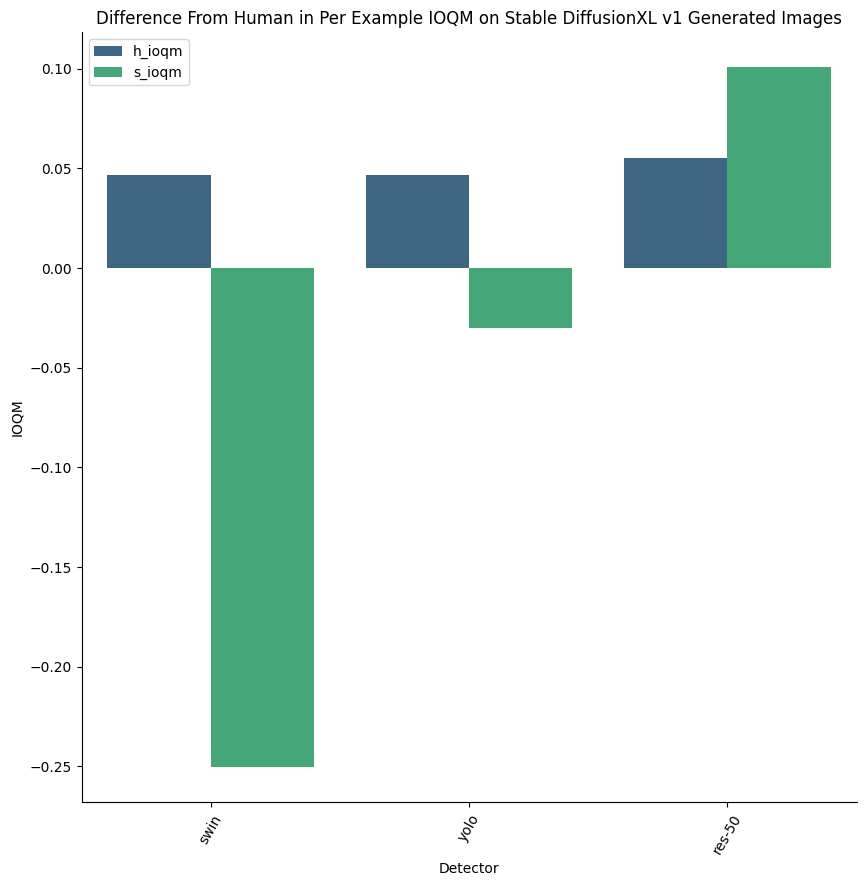

In [270]:
plot_validation_ioqm_bar(detectors=detectors, h_ioqms=h_diff, s_ioqms=s_diff, title=title)

# **Prompt Experiments**

Here we take the best aligning detector model and score a subset of images created by the 3 selected diffusion models using various prompting strategies.

In [316]:
import numpy as np
import re

PROMPT_TEST_FOLDER = Path('/content/drive/MyDrive/ioqm_data/prompt_tests')
STRAT_PATTERN = re.compile(r"(?P<strat>[^ws]+)_(?P<dataset>[ws].*)_images")
yolo_detector = get_detector('yolo')


def score_all_prompt_strats(detector):
  prompt_strat_scores = []
  for strat_folder in os.listdir(PROMPT_TEST_FOLDER):
    print(f"{strat_folder=}")
    res = score_prompting_strategy(detector, PROMPT_TEST_FOLDER / strat_folder)
    m = STRAT_PATTERN.match(strat_folder)
    if m is None:
      continue
    res['strategy'] = m.group('strat')
    res['dataset'] = m.group('dataset')
    prompt_strat_scores.append(res)

  prompt_strat_scores = pd.DataFrame(prompt_strat_scores)
  return prompt_strat_scores


def score_prompting_strategy(detector_model, strat_folder_path):
  s_ioqms, h_ioqms = [], []
  for img_file in strat_folder_path.glob('*.png'):
    prompt, scores = evaluate_single_image(img_file, detector_model)
    s_ioqms.append(scores['soft_ioqm'])
    h_ioqms.append(scores['hard_ioqm'])

  mean_soft_ioqm = np.mean(s_ioqms)
  mean_hard_ioqm = np.mean(h_ioqms)
  return {'mean_soft_ioqm': mean_soft_ioqm, 'mean_hard_ioqm': mean_hard_ioqm}

In [317]:
prompt_strat_scores = score_all_prompt_strats(yolo_detector)

strat_folder='comma_joined_table_stable-diffusion-v1-5_images'


0: 640x640 1 sheep, 2 forks, 1 knife, 3 spoons, 1 bowl, 3 chairs, 1 dining table, 6887.5ms
Speed: 1.4ms pre-process, 6887.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 4440.3ms
Speed: 1.3ms pre-process, 4440.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 4424.2ms
Speed: 1.2ms pre-process, 4424.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 2 vases, 7512.5ms
Speed: 1.3ms pre-process, 7512.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 skis, 6144.5ms
Speed: 1.2ms pre-process, 6144.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4440.6ms
Speed: 1.3ms pre-process, 4440.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 oranges, 5000.8ms
Speed: 1.2ms pre-process, 5000.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0:

strat_folder='.ipynb_checkpoints'
strat_folder='comma_joined_table_stable-diffusion-xl-refiner-1.0_images'


0: 640x640 1 sheep, 1 orange, 4378.2ms
Speed: 1.3ms pre-process, 4378.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 1 knife, 6779.7ms
Speed: 1.2ms pre-process, 6779.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bowl, 1 potted plant, 6729.3ms
Speed: 1.2ms pre-process, 6729.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 4420.4ms
Speed: 1.2ms pre-process, 4420.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 cup, 4409.2ms
Speed: 1.2ms pre-process, 4409.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 knifes, 7442.0ms
Speed: 1.3ms pre-process, 7442.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 6051.0ms
Speed: 1.2ms pre-process, 6051.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 4393.4ms
Speed: 1.3ms pre-

strat_folder='comma_joined_table_wuerstchen_images'


0: 640x640 1 sheep, 2 chairs, 6331.1ms
Speed: 1.2ms pre-process, 6331.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 7284.4ms
Speed: 1.2ms pre-process, 7284.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 4404.8ms
Speed: 1.5ms pre-process, 4404.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 1 vase, 4398.4ms
Speed: 1.3ms pre-process, 4398.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7061.9ms
Speed: 1.3ms pre-process, 7061.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 surfboard, 1 chair, 6468.6ms
Speed: 2.3ms pre-process, 6468.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 4369.2ms
Speed: 1.3ms pre-process, 4369.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 4501.9ms
Speed: 1.3ms pre-pro

strat_folder='and_joined_stable-diffusion-v1-5_images'


0: 640x640 1 sheep, 7380.3ms
Speed: 8.4ms pre-process, 7380.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 4694.4ms
Speed: 1.3ms pre-process, 4694.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 vase, 4418.5ms
Speed: 1.2ms pre-process, 4418.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 6586.4ms
Speed: 1.3ms pre-process, 6586.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7020.6ms
Speed: 8.2ms pre-process, 7020.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 skiss, 4420.7ms
Speed: 1.2ms pre-process, 4420.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 oranges, 4422.7ms
Speed: 1.2ms pre-process, 4422.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 7154.7ms
Speed: 1.2ms pre-process, 7154.7ms inference, 1.9ms postpro

strat_folder='and_joined_table_stable-diffusion-v1-5_images'


0: 640x640 3 sheeps, 6367.2ms
Speed: 1.2ms pre-process, 6367.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 4398.0ms
Speed: 1.6ms pre-process, 4398.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 1 vase, 4595.2ms
Speed: 1.1ms pre-process, 4595.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 potted plants, 2 vases, 7630.0ms
Speed: 8.2ms pre-process, 7630.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5755.1ms
Speed: 1.3ms pre-process, 5755.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 couch, 4466.9ms
Speed: 1.3ms pre-process, 4466.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 oranges, 5360.1ms
Speed: 1.4ms pre-process, 5360.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 7502.4ms
Speed: 1.2ms pre-process, 7502.4

strat_folder='and_joined_table_stable-diffusion-xl-refiner-1.0_images'


0: 640x640 1 bench, 1 sheep, 5103.3ms
Speed: 1.4ms pre-process, 5103.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 4383.5ms
Speed: 1.3ms pre-process, 4383.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 6064.7ms
Speed: 1.2ms pre-process, 6064.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 7335.1ms
Speed: 1.3ms pre-process, 7335.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4500.5ms
Speed: 1.3ms pre-process, 4500.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4394.4ms
Speed: 1.2ms pre-process, 4394.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 6897.7ms
Speed: 1.3ms pre-process, 6897.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 bowls, 7 oranges, 6711.0ms
Speed: 1.2ms pre-process, 6711.0ms inferen

strat_folder='and_joined_table_wuerstchen_images'


0: 640x640 1 sheep, 4398.8ms
Speed: 1.3ms pre-process, 4398.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 5846.5ms
Speed: 1.4ms pre-process, 5846.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 1 vase, 7412.8ms
Speed: 1.2ms pre-process, 7412.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 potted plants, 3 vases, 4658.0ms
Speed: 1.3ms pre-process, 4658.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4412.4ms
Speed: 1.2ms pre-process, 4412.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 surfboards, 6616.9ms
Speed: 1.2ms pre-process, 6616.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 6990.2ms
Speed: 1.3ms pre-process, 6990.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 4378.6ms
Speed: 1.3ms pre-process, 437

strat_folder='and_joined_stable-diffusion-xl-refiner-1.0_images'


0: 640x640 1 sheep, 5363.8ms
Speed: 1.2ms pre-process, 5363.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 sheeps, 7542.7ms
Speed: 1.2ms pre-process, 7542.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 2 vases, 5004.0ms
Speed: 1.5ms pre-process, 5004.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 potted plants, 4401.0ms
Speed: 1.3ms pre-process, 4401.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 skis, 6270.2ms
Speed: 1.3ms pre-process, 6270.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 skis, 7296.0ms
Speed: 9.3ms pre-process, 7296.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 oranges, 4408.4ms
Speed: 1.4ms pre-process, 4408.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 2 oranges, 1 carrot, 4

strat_folder='and_joined_wuerstchen_images'


0: 640x640 1 umbrella, 1 potted plant, 1 vase, 7952.3ms
Speed: 1.2ms pre-process, 7952.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 umbrellas, 1 vase, 5329.0ms
Speed: 1.3ms pre-process, 5329.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 umbrellas, 1 kite, 1 potted plant, 2 vases, 4407.3ms
Speed: 1.3ms pre-process, 4407.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 umbrella, 1 potted plant, 2 vases, 5844.4ms
Speed: 1.3ms pre-process, 5844.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7371.6ms
Speed: 1.2ms pre-process, 7371.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 4705.2ms
Speed: 1.3ms pre-process, 4705.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 skiss, 4361.0ms
Speed: 1.3ms pre-process, 4361.0ms inference, 1.4ms postprocess per image at shape (

strat_folder='comma_joined_wuerstchen_images'


0: 640x640 1 sheep, 5908.1ms
Speed: 1.2ms pre-process, 5908.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 sheeps, 4368.2ms
Speed: 1.3ms pre-process, 4368.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 5061.3ms
Speed: 1.3ms pre-process, 5061.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 potted plants, 7469.4ms
Speed: 1.2ms pre-process, 7469.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 skis, 5336.7ms
Speed: 1.4ms pre-process, 5336.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 skiss, 4368.2ms
Speed: 2.4ms pre-process, 4368.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 5698.3ms
Speed: 1.2ms pre-process, 5698.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 7383.6ms
Speed: 1.3ms pre-process, 7383.6m

strat_folder='comma_joined_stable-diffusion-xl-refiner-1.0_images'


0: 640x640 1 sheep, 4398.1ms
Speed: 1.3ms pre-process, 4398.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 sheeps, 4364.9ms
Speed: 1.3ms pre-process, 4364.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 7661.5ms
Speed: 1.2ms pre-process, 7661.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5999.6ms
Speed: 1.3ms pre-process, 5999.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 1 skis, 4391.1ms
Speed: 1.3ms pre-process, 4391.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 skiss, 5027.0ms
Speed: 1.3ms pre-process, 5027.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 oranges, 7462.0ms
Speed: 1.2ms pre-process, 7462.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 5329.8ms
Speed: 1.3ms pre-process, 5329.8ms inference, 1.

strat_folder='comma_joined_stable-diffusion-v1-5_images'


0: 640x640 6 sheeps, 4471.3ms
Speed: 1.2ms pre-process, 4471.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 sheeps, 7001.3ms
Speed: 1.3ms pre-process, 7001.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 potted plant, 1 vase, 6639.5ms
Speed: 1.2ms pre-process, 6639.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bowl, 2 potted plants, 4419.5ms
Speed: 1.3ms pre-process, 4419.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 1 skis, 4564.9ms
Speed: 1.3ms pre-process, 4564.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 1 skis, 7493.8ms
Speed: 1.2ms pre-process, 7493.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 orange, 6085.4ms
Speed: 1.4ms pre-process, 6085.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 oranges, 4400.1ms
Speed:

In [320]:
d = prompt_strat_scores.dropna()
d

,mean_soft_ioqm,mean_hard_ioqm,strategy,dataset
0,0.630,0.29,comma_joined_table,stable-diffusion-v1-5
1,0.695,0.42,comma_joined_table,stable-diffusion-xl-refiner-1.0
2,0.555,0.37,comma_joined_table,wuerstchen
3,0.560,0.31,and_joined,stable-diffusion-v1-5
4,0.660,0.32,and_joined_table,stable-diffusion-v1-5
5,0.765,0.37,and_joined_table,stable-diffusion-xl-refiner-1.0
6,0.550,0.38,and_joined_table,wuerstchen
7,0.760,0.36,and_joined,stable-diffusion-xl-refiner-1.0
8,0.515,0.40,and_joined,wuerstchen
9,0.575,0.36,comma_joined,wuerstchen


In [353]:
d = d.groupby(['strategy']).mean()
d

,mean_soft_ioqm,mean_hard_ioqm
strategy,,
and_joined,0.611667,0.356667
and_joined_table,0.658333,0.356667
comma_joined,0.675000,0.333333
comma_joined_table,0.626667,0.360000


In [354]:
print(d.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  mean\_soft\_ioqm &  mean\_hard\_ioqm \\
strategy           &                 &                 \\
\midrule
and\_joined         &        0.611667 &        0.356667 \\
and\_joined\_table   &        0.658333 &        0.356667 \\
comma\_joined       &        0.675000 &        0.333333 \\
comma\_joined\_table &        0.626667 &        0.360000 \\
\bottomrule
\end{tabular}



<ipython-input-354-7d9704528385>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d.to_latex())


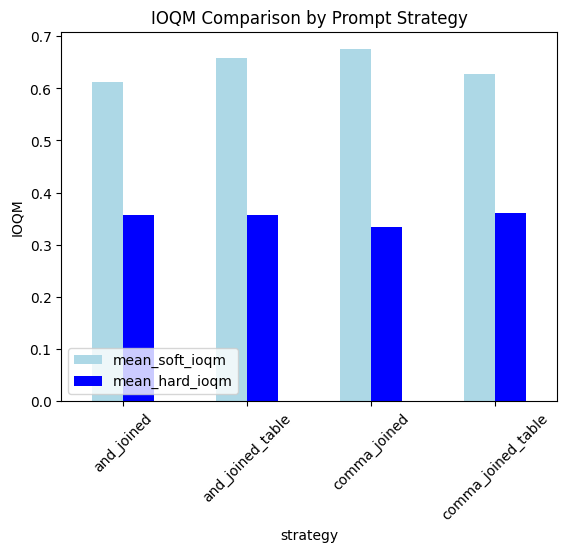

In [355]:
color = ['lightblue', 'blue', 'purple', 'black']
d.plot.bar(color=color, rot=45, title='IOQM Comparison by Prompt Strategy', ylabel='IOQM', ).legend(loc='lower left');

In [356]:
print(d.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  mean\_soft\_ioqm &  mean\_hard\_ioqm \\
strategy           &                 &                 \\
\midrule
and\_joined         &        0.611667 &        0.356667 \\
and\_joined\_table   &        0.658333 &        0.356667 \\
comma\_joined       &        0.675000 &        0.333333 \\
comma\_joined\_table &        0.626667 &        0.360000 \\
\bottomrule
\end{tabular}



<ipython-input-356-7d9704528385>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d.to_latex())
